# Created BY Suayeb Ahmed

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
import spacy
import re,string,unicodedata
from wordcloud import WordCloud,STOPWORDS



**Look into Data**

In [12]:
import pandas as pd
url = "imdb_dataset.csv"
data = pd.read_csv(url)
print(data.shape)
data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [14]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [15]:
data.sentiment.values

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [16]:
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**SPLIT THE DATASET. 80-20**

In [19]:
# train dataset
reviews_train_data = data.review[:40000]
sentiment_train_data = data.sentiment[:40000]

# test dataset
reviews_test_data = data.review[40000:]
sentiment_test_data = data.sentiment[40000:]

print(f"train dataset: reviews: {reviews_train_data.shape} sentiment: {sentiment_train_data.shape}")
print(f"test dataset: reviews: {reviews_test_data.shape} sentiment: {sentiment_test_data.shape}")

train dataset: reviews: (40000,) sentiment: (40000,)
test dataset: reviews: (10000,) sentiment: (10000,)


In [22]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [23]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [24]:
# Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

In [25]:
#Removing the html strips
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = remove_html(text)
    text = remove_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [26]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{"didn't", 'll', 'how', 'on', 'because', 'over', "you've", 'below', 'he', 'be', 'their', 'ours', 'themselves', 'above', "she's", 'who', 'during', 'what', 'nor', 'only', 'her', 'both', 'yours', 'the', 'up', 'more', 'himself', 'whom', 'each', 'between', 'do', "don't", 'does', 'by', 'under', 'for', 'ain', 'our', 'most', 'yourselves', 'these', 'haven', 'can', 'while', 'about', 'them', 'to', "couldn't", 'from', 'yourself', 'that', 've', "you'd", 'when', "shouldn't", 'didn', 'hadn', 'at', "shan't", 'myself', 'isn', 'now', 'wouldn', 'you', 'those', 're', "hadn't", 'y', 'until', 'out', 'through', "mustn't", 'same', 'his', 'am', 'not', 'herself', "that'll", 'needn', "you'll", 't', 'had', "should've", 'with', 'have', 'shan', 'any', "wasn't", 'my', 'is', 'all', 'aren', 'couldn', 'as', 'there', 'few', 'me', 'she', 'being', "you're", 'again', 'other', 'and', 'why', 'i', 'such', 'its', 'in', "wouldn't", 'no', 'own', 'was', 'further', 'having', "aren't", 'your', 'should', 'or', "hasn't", 'mightn', 'w

In [32]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
data['review'] = data['review'].apply(lemmatize_text)

In [33]:
# normalize train reviews
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen mebr br first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordbr br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awaybr br would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill 

In [34]:
# normalize test reviews
norm_test_reviews=data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi el didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert child may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand onl

**Bag of Words Model**

In [36]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=1,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6134801)
BOW_cv_test: (10000, 6134801)


**TF-IDF Model**

In [38]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=1,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('TF-IDF_train:',tv_train_reviews.shape)
print('TF-IDF_test:',tv_test_reviews.shape)

TF-IDF_train: (40000, 6134801)
TF-IDF_test: (10000, 6134801)


In [39]:
#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [40]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Logistic Regression

In [60]:
#training the model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow = lr.fit(cv_train_reviews,train_sentiments)
#Fitting the model for tfidf features
lr_tfidf = lr.fit(tv_train_reviews,train_sentiments)

/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
#Predicting the model for bag of words
lr_bow_predict = lr.predict(cv_test_reviews)
##Predicting the model for tfidf features
lr_tfidf_predict = lr.predict(tv_test_reviews)

In [62]:
# Accuracy score(bag of words)
lr_bow_score = accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
# Accuracy score(tfidf features)
lr_tfidf_score = accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7517
lr_tfidf_score : 0.7517


In [63]:
# Classification report for bag of words
lr_bow_report = classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

# Classification report for tfidf features
lr_tfidf_report = classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.76      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [67]:
#confusion matrix for bag of words
cm_bow = confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print("LR confusion matrix for bag of words")
print(cm_bow)
print("LR confusion matrix for tfidf features")
print(cm_tfidf)

LR confusion matrix for bag of words
[[3762 1245]
 [1238 3755]]
LR confusion matrix for tfidf features
[[3674 1333]
 [1150 3843]]


## SVM (Support Vector Machine)

In [68]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)

/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)

In [70]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5856
svm_tfidf_score : 0.5112


In [71]:
#Classification report for bag of words
print('SVM BOW:')
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
print('SVM TFIDF:')
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

SVM BOW:
              precision    recall  f1-score   support

    Positive       0.94      0.18      0.31      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.59     10000
   macro avg       0.74      0.59      0.51     10000
weighted avg       0.74      0.59      0.51     10000

SVM TFIDF:
              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [72]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print("SVM confusion matrix for bag of words")
print(cm_bow)
print("SVM confusion matrix for tfidf features")
print(cm_tfidf)

SVM confusion matrix for bag of words
[[4945   62]
 [4082  911]]
SVM confusion matrix for tfidf features
[[5007    0]
 [4888  105]]


## Naive Bayes

In [41]:
# For Bag of Words
nb_bow = MultinomialNB()
nb_bow.fit(cv_train_reviews, train_sentiments)

# Predicting the Test set results
nb_bow_predictions = nb_bow.predict(cv_test_reviews)

# For TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(tv_train_reviews, train_sentiments)

# Predicting the Test set results
nb_tfidf_predictions = nb_tfidf.predict(tv_test_reviews)

/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
# Accuracy score
nb_bow_score = accuracy_score(test_sentiments, nb_bow_predictions)
print("NB BoW Model Accuracy Score: ", nb_bow_score)

# Accuracy score
nb_tfidf_score = accuracy_score(test_sentiments, nb_tfidf_predictions)
print("NB TF-IDF Model Accuracy Score: ", nb_tfidf_score)

BoW Model Accuracy Score:  0.7516
TF-IDF Model Accuracy Score:  0.7513


In [43]:
# NB BOW Classification report
nb_bow_report = classification_report(test_sentiments, nb_bow_predictions)
print("NB BoW Model Classification Report: \n", nb_bow_report)

# NB TFIDF Classification report
nb_tfidf_report = classification_report(test_sentiments, nb_tfidf_predictions)
print("NB TF-IDF Model Classification Report: \n", nb_tfidf_report)

BoW Model Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.77      0.76      4993
           1       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

TF-IDF Model Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      4993
           1       0.76      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



## KNN

In [46]:
# For Bag of Words
knn_bow = KNeighborsClassifier(n_neighbors=5)
knn_bow.fit(cv_train_reviews, train_sentiments)

# Predicting the Test set results
knn_bow_predictions = knn_bow.predict(cv_test_reviews)

# For TF-IDF
knn_tfidf = KNeighborsClassifier(n_neighbors=5)
knn_tfidf.fit(tv_train_reviews, train_sentiments)

# Predicting the Test set results
knn_tfidf_predictions = knn_tfidf.predict(tv_test_reviews)

/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
# Accuracy score
knn_bow_score = accuracy_score(test_sentiments, knn_bow_predictions)
print("KNN BoW Model Accuracy Score: ", knn_bow_score)

# Accuracy score
knn_tfidf_score = accuracy_score(test_sentiments, knn_tfidf_predictions)
print("KNN TF-IDF Model Accuracy Score: ", knn_tfidf_score)

BoW Model Accuracy Score:  0.5054
TF-IDF Model Accuracy Score:  0.4993


In [48]:
# classification report for BoW
knn_bow_report = classification_report(test_sentiments, knn_bow_predictions)
print("KNN BoW Model Classification Report: \n", knn_bow_report)

# Classification report for TF-IDF
knn_tfidf_report = classification_report(test_sentiments, knn_tfidf_predictions)
print("KNN TF-IDF Model Classification Report: \n", knn_tfidf_report)

BoW Model Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.95      0.66      4993
           1       0.56      0.06      0.11      5007

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.38     10000
weighted avg       0.53      0.51      0.38     10000

TF-IDF Model Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4993
           1       0.00      0.00      0.00      5007

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

**Random Forest**

In [55]:
# For Bag of Words
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(cv_train_reviews, train_sentiments)

# Predicting the Test set results
rf_bow_predictions = rf_bow.predict(cv_test_reviews)

# For TF-IDF
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(tv_train_reviews, train_sentiments)

# Predicting the Test set results
rf_tfidf_predictions = rf_tfidf.predict(tv_test_reviews)

/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/suayebahmed/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [56]:
# RF Accuracy score
rf_bow_score = accuracy_score(test_sentiments, rf_bow_predictions)
print("RF BoW Model Accuracy Score: ", rf_bow_score)

# RF Accuracy score
rf_tfidf_score = accuracy_score(test_sentiments, rf_tfidf_predictions)
print("RF TF-IDF Model Accuracy Score: ", rf_tfidf_score)

RF BoW Model Accuracy Score:  0.5046
RF TF-IDF Model Accuracy Score:  0.5046


In [57]:
# RF Classification report
rf_bow_report = classification_report(test_sentiments, rf_bow_predictions)
print("RF BoW Model Classification Report: \n", rf_bow_report)

# RF Classification report
rf_tfidf_report = classification_report(test_sentiments, rf_tfidf_predictions)
print("RF TF-IDF Model Classification Report: \n", rf_tfidf_report)

RF BoW Model Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4993
           1       0.98      0.01      0.02      5007

    accuracy                           0.50     10000
   macro avg       0.74      0.51      0.34     10000
weighted avg       0.74      0.50      0.34     10000

RF TF-IDF Model Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4993
           1       0.98      0.01      0.02      5007

    accuracy                           0.50     10000
   macro avg       0.74      0.51      0.34     10000
weighted avg       0.74      0.50      0.34     10000



In [58]:
# RF Confusion Matrix
rf_bow_cm = confusion_matrix(test_sentiments, rf_bow_predictions)
print("RF BoW Model Confusion Matrix: \n", rf_bow_cm)

# RF Confusion Matrix
rf_tfidf_cm = confusion_matrix(test_sentiments, rf_tfidf_predictions)
print("RF TF-IDF Model Confusion Matrix: \n", rf_tfidf_cm)

RF BoW Model Confusion Matrix: 
 [[4992    1]
 [4953   54]]
RF TF-IDF Model Confusion Matrix: 
 [[4992    1]
 [4953   54]]


### Compare all models and Graph

LR BoW Model Accuracy Score:  0.7517
LR TF-IDF Model Accuracy Score:  0.7517
SVM BoW Model Accuracy Score:  0.5856
SVM TF-IDF Model Accuracy Score:  0.5112
NB BoW Model Accuracy Score:  0.7516
NB TF-IDF Model Accuracy Score:  0.7513
KNN BoW Model Accuracy Score:  0.5054
KNN TF-IDF Model Accuracy Score:  0.4993
RF BoW Model Accuracy Score:  0.5046
RF TF-IDF Model Accuracy Score:  0.5046


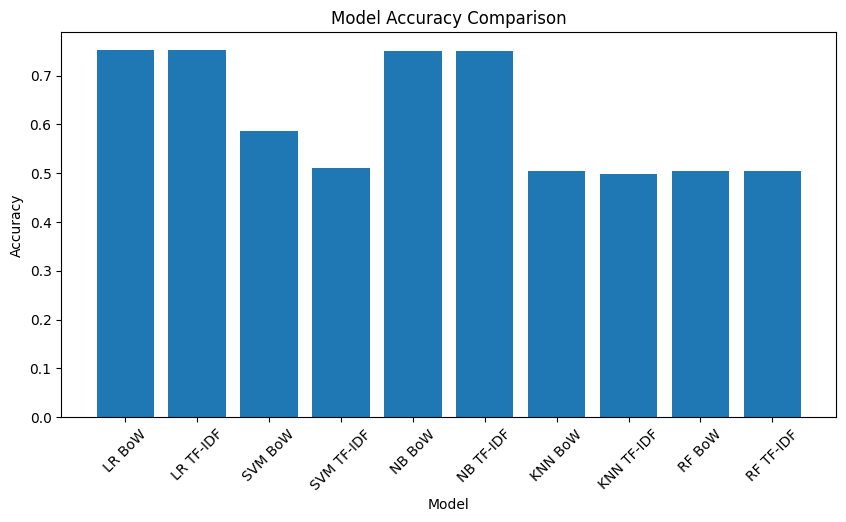

In [80]:
# accuracy comparison
print("LR BoW Model Accuracy Score: ", lr_bow_score)
print("LR TF-IDF Model Accuracy Score: ", lr_tfidf_score)
print("SVM BoW Model Accuracy Score: ", svm_bow_score)
print("SVM TF-IDF Model Accuracy Score: ", svm_tfidf_score)
print("NB BoW Model Accuracy Score: ", nb_bow_score)
print("NB TF-IDF Model Accuracy Score: ", nb_tfidf_score)
print("KNN BoW Model Accuracy Score: ", knn_bow_score)
print("KNN TF-IDF Model Accuracy Score: ", knn_tfidf_score)
print("RF BoW Model Accuracy Score: ", rf_bow_score)
print("RF TF-IDF Model Accuracy Score: ", rf_tfidf_score)

accuracy_scores = {
    'LR BoW': lr_bow_score,
    'LR TF-IDF': lr_tfidf_score,
    'SVM BoW': svm_bow_score,
    'SVM TF-IDF': svm_tfidf_score,
    'NB BoW': nb_bow_score,
    'NB TF-IDF': nb_tfidf_score,
    'KNN BoW': knn_bow_score,
    'KNN TF-IDF': knn_tfidf_score,
    'RF BoW': rf_bow_score,
    'RF TF-IDF': rf_tfidf_score
}

# Create bar graph
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

#### Creating DataFrame with Precision, Recall, F1 Score and then Graph

In [76]:
# Create a list of models
models = ['LR BoW', 'LR TF-IDF', 'SVM BoW', 'SVM TF-IDF', 'NB BoW', 'NB TF-IDF', 'KNN BoW', 'KNN TF-IDF', 'RF BoW', 'RF TF-IDF']

# Create a list of classification reports
reports = [lr_bow_report, lr_tfidf_report, svm_bow_report, svm_tfidf_report, nb_bow_report, nb_tfidf_report, knn_bow_report, knn_tfidf_report, rf_bow_report, rf_tfidf_report]

# Create a DataFrame to store the scores
scores_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])

# Extract the scores and store them in the DataFrame
for model, report in zip(models, reports):
    lines = report.split('\n')
    row_data = lines[-2].split()
    scores_df = scores_df.append({
        'Model': model,
        'Precision': float(row_data[2]),
        'Recall': float(row_data[3]),
        'F1-Score': float(row_data[4])
    }, ignore_index=True)

# Print the scores
print(scores_df)

        Model  Precision  Recall  F1-Score
0      LR BoW       0.75    0.75      0.75
1   LR TF-IDF       0.75    0.75      0.75
2     SVM BoW       0.74    0.59      0.51
3  SVM TF-IDF       0.75    0.51      0.36
4      NB BoW       0.75    0.75      0.75
5   NB TF-IDF       0.75    0.75      0.75
6     KNN BoW       0.53    0.51      0.38
7  KNN TF-IDF       0.25    0.50      0.33
8      RF BoW       0.74    0.50      0.34
9   RF TF-IDF       0.74    0.50      0.34


/var/folders/9y/lwd81r8s457d0rbd7wgzx4w40000gn/T/ipykernel_46448/2407407183.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/var/folders/9y/lwd81r8s457d0rbd7wgzx4w40000gn/T/ipykernel_46448/2407407183.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/var/folders/9y/lwd81r8s457d0rbd7wgzx4w40000gn/T/ipykernel_46448/2407407183.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/var/folders/9y/lwd81r8s457d0rbd7wgzx4w40000gn/T/ipykernel_46448/2407407183.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/var

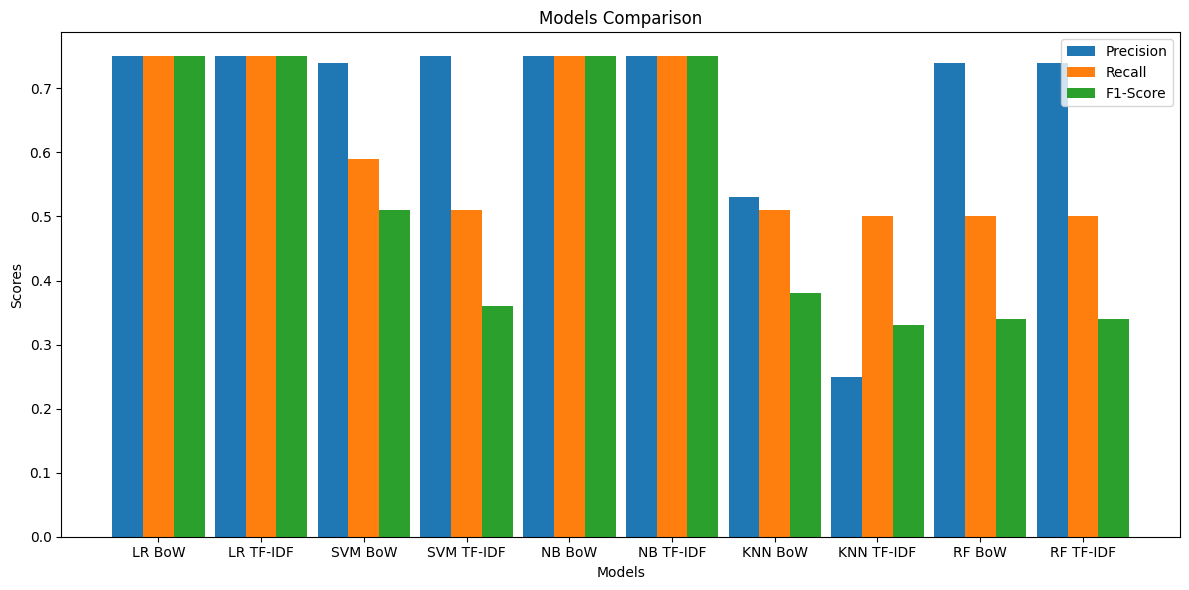

In [77]:
# Grouped Bar Chart

labels = scores_df['Model']
precision = scores_df['Precision']
recall = scores_df['Recall']
f1_score = scores_df['F1-Score']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Models Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

**Word Cloud**

<function matplotlib.pyplot.show(close=None, block=None)>

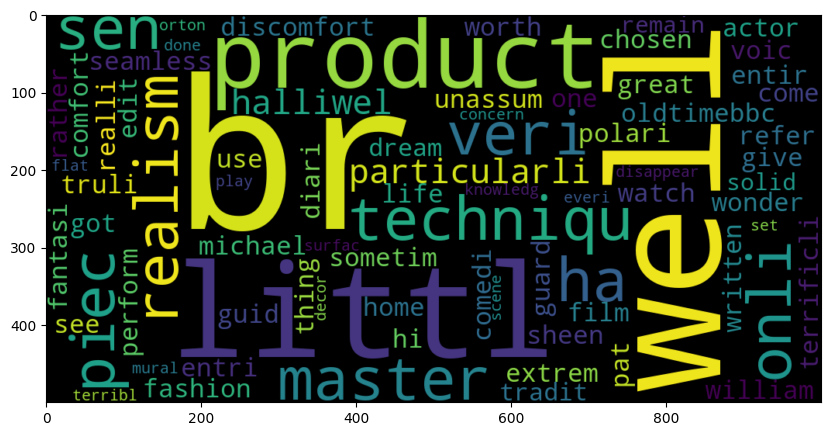

In [78]:
# positive review word (word clouds)
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

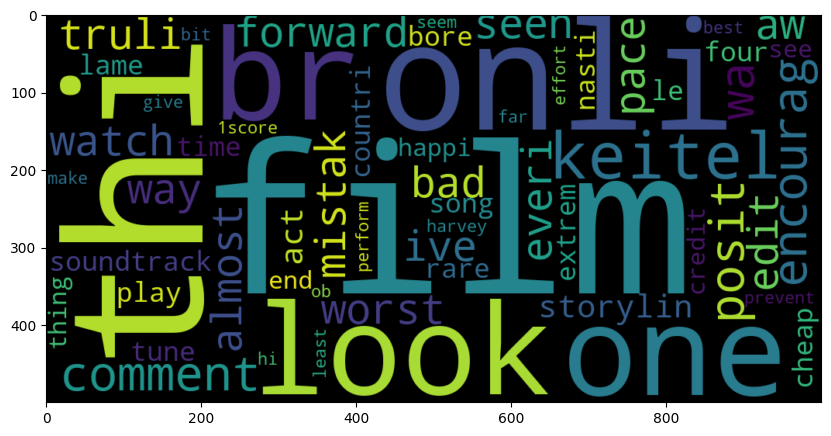

In [79]:
# negative review word (word clouds)
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show